In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
PROJECT_ROOT_DIR = "./"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "img")
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "data")
os.makedirs(IMAGES_PATH, exist_ok=True)
os.makedirs(DATA_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def load_csv(path=DATA_PATH, fich="ex1data1.csv"):
    os.makedirs(path, exist_ok=True)
    csv_path = os.path.join(path,fich)
    datos = pd.read_csv(csv_path, header=None).values
    return datos.astype(float) 

In [3]:
datos = load_csv(fich="ex2data1.csv")
type(datos)

numpy.ndarray

In [4]:
np.shape(datos)

(100, 3)

# 1. Regresión logística
Los datos del fichero ex2data1.csv representan las notas obtenidas por una serie de candidatos en los dos exámenes de admisión de una universidad junto con la información sobre si
fueron (1) o no (0) admitidos. El objetivo de la práctica es construir un modelo por regresión
logística que estime la probabilidad de que un estudiante sea admitido en esa universidad en base
a las notas de sus exámenes.


In [5]:
X = datos[:,:-1]
np.shape(X) #(100,2)

Y = datos[:,-1]
np.shape(Y) #(100,0)

m = np.shape(X)[0]
n = np.shape(X)[1]

# añadimos una columna de 1's a la X
X = np.hstack([np.ones([m, 1]), X])

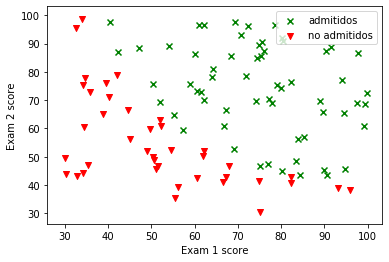

In [6]:
#admitidos
pos = np.where(Y == 1)
plt.scatter(X[pos, 1], X[pos, 2], marker='x', c='g', label='admitidos')
#no admitidos
pos = np.where(Y == 0)
plt.scatter(X[pos,1], X[pos,2], marker='v', c='r', label='no admitidos')
plt.legend(loc = 'upper right')
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.show()

## Función sigmoide

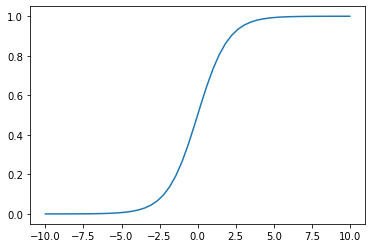

In [18]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

x = np.linspace(-10,10,50)
y = sigmoid(x)

plt.plot(x,y)
plt.show()

In [8]:
theta = np.zeros(np.shape(X[1]))

## Funcion de coste

In [9]:
def cost(theta, X, Y):
    H = sigmoid(np.matmul(X, Theta)) # X\theta
    cost = (-1 / len(X)) * (np.matmul(np.log(H).T, Y) + np.matmul(np.log(1 - H).T, 1 - Y))
    return cost


def coste(theta, X, Y):
    # H = sigmoid(np.matmul(X, np.transpose(theta)))
    H = sigmoid(np.matmul(X, theta))
    # cost = (- 1 / (len(X))) * np.sum( Y * np.log(H) + (1 - Y) * np.log(1 - H) )
    cost = (- 1 / (len(X))) * (np.matmul(Y, np.log(H)) + np.matmul((1 - Y), np.log(1 - H)))
    return cost

coste(theta, X, Y)

0.6931471805599453

## Gradiente

In [10]:
def gradient(Theta, X, Y):
    H = sigmoid(np.matmul(X, Theta))
    return (1/len(X)) * (np.matmul(X.T, H - Y))
    
gradient(theta, X,Y)

array([ -0.1       , -12.00921659, -11.26284221])

## Valor optimo de los parametros

In [11]:
import scipy.optimize as opt

result = opt.fmin_tnc(func=coste, x0=theta, fprime=gradient, args=(X, Y))
theta_opt = result[0]

theta_opt

array([-25.16131854,   0.20623159,   0.20147149])

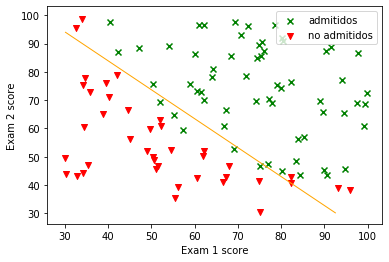

In [12]:
def pinta_frontera_recta(theta, X, Y):
    plt.figure()
    #admitidos
    pos = np.where(Y == 1)
    plt.scatter(X[pos, 1], X[pos, 2], marker='x', c='g', label='admitidos')
    #no admitidos
    pos = np.where(Y == 0)
    plt.scatter(X[pos,1], X[pos,2], marker='v', c='r', label='no admitidos')
    plt.legend(loc = 'upper right')
    plt.xlabel("Exam 1 score")
    plt.ylabel("Exam 2 score")
    #plt.show()

    x1_min, x1_max = X[:, 1].min(), X[:, 2].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 2].max()

    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max),
    np.linspace(x2_min, x2_max))

    h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0], 1)), xx1.ravel(), xx2.ravel()].dot(theta))

    h = h.reshape(xx1.shape)
    # el cuarto parámetro es el valor de z cuya frontera se
    # quiere pintar
    plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='orange')
    plt.savefig("frontera.pdf")
    plt.show()
    plt.close()


pinta_frontera_recta(theta_opt, X, Y)

## Evaluacion regresion logistica

In [62]:
z = np.dot(X[:,:], theta_opt)
sigmoid(z)

admitidos = z[z >= 0.5] #admitidos 57 (predict)
no_admitidos = z[z < 0.5] #no_admitidos 43 (predict)

#admitidos 60 (real)
pos = np.where(Y == 1)
len((X[pos, 1])[0])

#no admitidos 40 (real)
pos = np.where(Y == 0)
len((X[pos, 1])[0])

40

In [13]:
def plot_decisionboundary(X, Y, theta, poly):
    plt.figure()
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max),
    np.linspace(x2_min, x2_max))
    h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(),
    xx2.ravel()]).dot(theta))
    h = h.reshape(xx1.shape)
    plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='g')
    plt.savefig("boundary.pdf")
    plt.close()

plot_decisionboundary(X,Y, theta)

TypeError: plot_decisionboundary() missing 1 required positional argument: 'poly'